# Airline Sentiment Analysis

Analyze how travelers in February 2015 expressed their feelings on Twitter

https://www.kaggle.com/crowdflower/twitter-airline-sentiment


The main aim of this project is to demonstrate the basics of Natural Language Processing(NLP).

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preprocessing
    - Convert sentence into lower case
    - Remove Stop Words
    - Stemming or Lemmatization
4. Data Preparation
    - Train Test Split
    - Text to numerical vector using Bag of Words
5. Training and Evaluation


## 1. Loading the Data

Let's first have a look at the dataset and understand the size, attribute names etc.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tweet_df= pd.read_csv("data/Tweets.csv")

tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweet_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
# Since we want to implement sentiment analyser, we will consider only three columns
# 'airline_sentiment', 'airline', 'text'


tweet_df = tweet_df.loc[:, ['airline_sentiment', 'airline', 'text']]

## 2. Exploratory Data Analysis

In [8]:
tweet_df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [9]:
tweet_df.shape

(14640, 3)

In [10]:
tweet_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

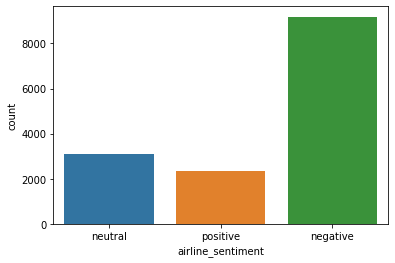

In [11]:
sns.countplot(x='airline_sentiment', data=tweet_df)

In [12]:
tweet_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

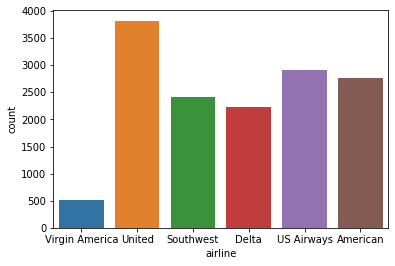

In [13]:
sns.countplot(x='airline', data=tweet_df)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

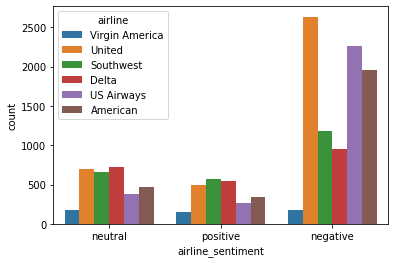

In [14]:
sns.countplot(x='airline_sentiment', hue='airline', data=tweet_df)

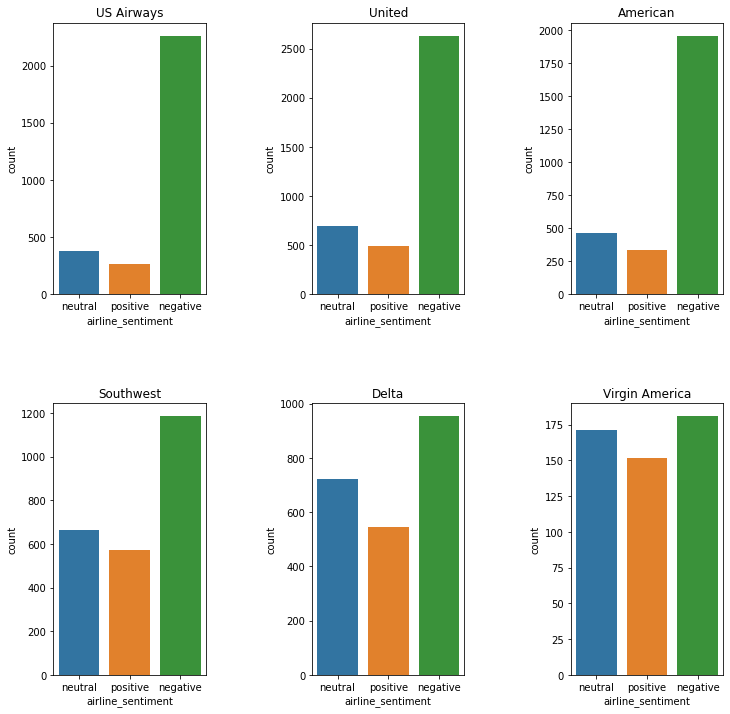

In [15]:
def plot_sub_sentiment(Airline):
    df = tweet_df.loc[tweet_df['airline']==Airline, :]
    sns.countplot(x='airline_sentiment', order=['neutral', 'positive', 'negative'], data=df)
    plt.title(Airline)

plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
plot_sub_sentiment('US Airways')

plt.subplot(2, 3, 2)
plot_sub_sentiment('United')

plt.subplot(2, 3, 3)
plot_sub_sentiment('American')

plt.subplot(2, 3, 4)
plot_sub_sentiment('Southwest')

plt.subplot(2, 3, 5)
plot_sub_sentiment('Delta')

plt.subplot(2, 3, 6)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of sentiment for the first three airlines are always skewed toward negative. On contrary, the sentiment are distributed more balanced with the later three airline companies. 

#### Word Cloud for the negative Tweets

In [14]:
# !pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

df.head()

,airline_sentiment,airline,text
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
15,negative,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,Virgin America,@VirginAmerica I flew from NYC to SFO last we...


In [17]:
df['airline_sentiment'].value_counts()

negative    9178
Name: airline_sentiment, dtype: int64

In [18]:
words = ' '.join(df['text'])

print(words[:2000])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

In [19]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

words = ' '.join(df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

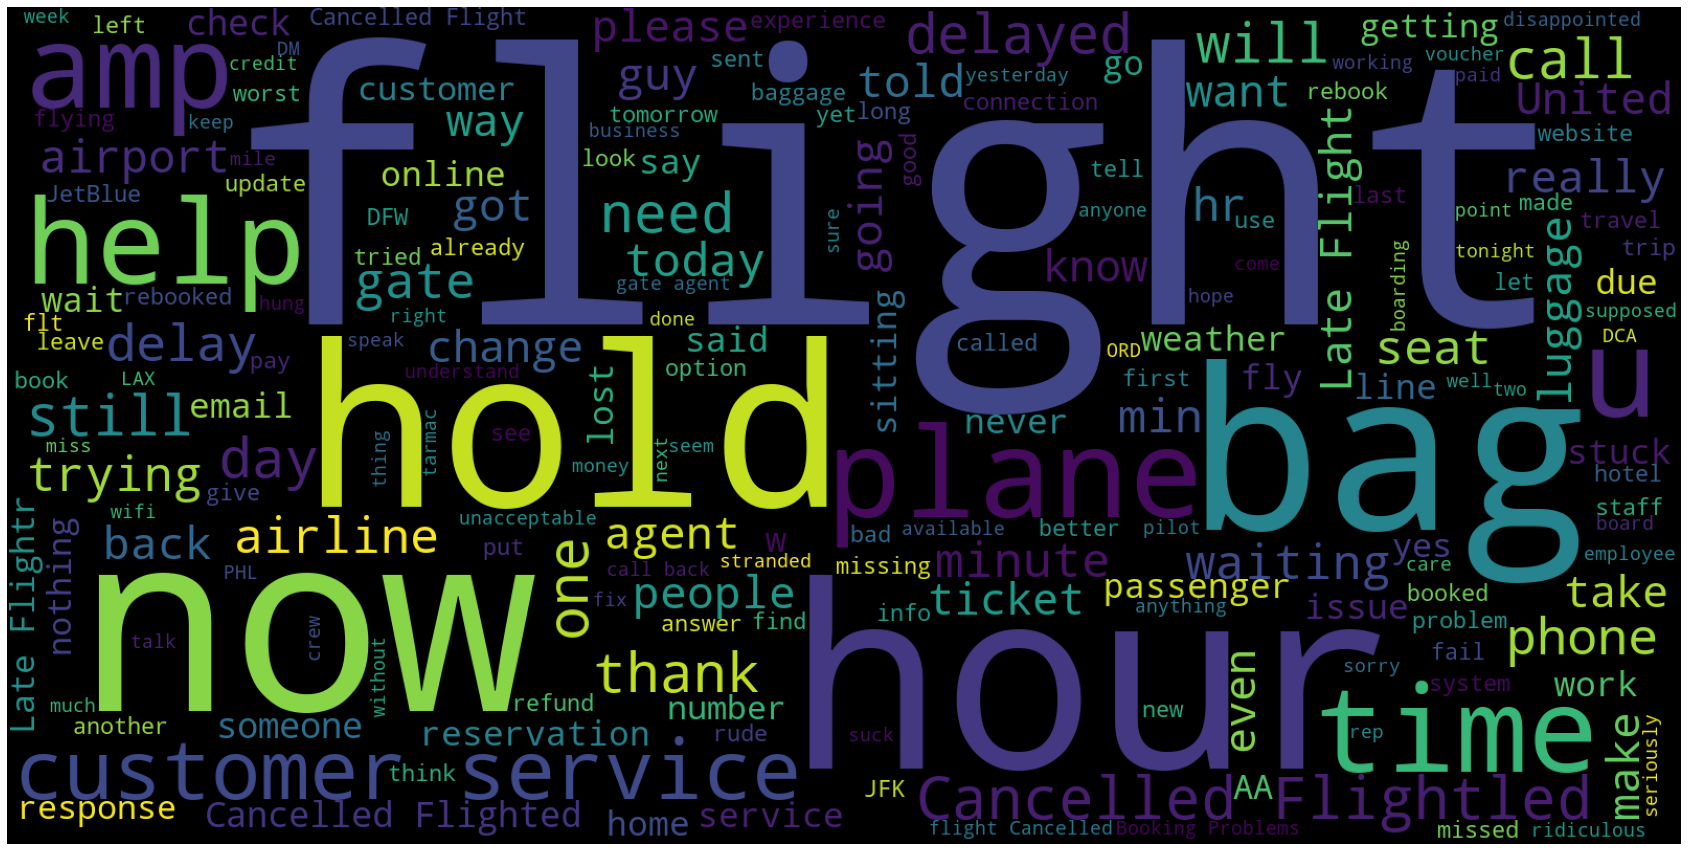

In [21]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**We can find that the Tweets with negative sentiment frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.**

## 3. Data Preprocessing

**Our data exploration ends here. The next step will be preprocess the data in order to make the learning process more smooth.**

Preprocessing steps:
- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization
    
 

In [22]:
# !pip install nltk

In [23]:
# import nltk
# nltk.download('stopwords')

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [18]:
# # We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [19]:
# initializing the lists

clean_tweet_lst = []

tweet_len_lst = []

In [20]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [21]:
# !pip install tqdm

In [22]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [23]:
clean_tweet_lst = []

tweet_len_lst = []

tweet_df['text'].progress_apply(lambda x: preprocess(x, 'stem'))

tweet_df['clean_tweet_stem'] = clean_tweet_lst

tweet_df['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:22<00:00, 176.98it/s]


In [32]:
tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5


In [33]:
# import nltk
# nltk.download('wordnet')

In [34]:
clean_tweet_lst = []

tweet_len_lst = []

tweet_df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

tweet_df['clean_tweet_lema'] = clean_tweet_lst

tweet_df['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:45<00:00, 138.74it/s]


In [35]:
tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5


## 4. Data Preparation 

Let's now prepare the data and build the model.

In [24]:
# Preparing the target variable

tweet_df['sentiment']=tweet_df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,0


In [25]:
tweet_df['sentiment'].value_counts()

0    9178
1    5462
Name: sentiment, dtype: int64

In [26]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(tweet_df,test_size=0.2,random_state=42)

In [27]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

**Text to numerical vector using Bag of Words**

BAG OF WORDS:
https://machinelearningmastery.com/gentle-introduction-bag-words-model/

CODE EXAMPLE:
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

In [29]:
vectorizer.vocabulary_

{'unit': 68699,
 'offer': 45795,
 'us': 70254,
 'room': 54872,
 'peopl': 48225,
 'fail': 22284,
 'unit offer': 69347,
 'offer us': 45868,
 'us room': 70447,
 'room peopl': 54896,
 'peopl fail': 48260,
 'jetblu': 34793,
 'jfk': 35556,
 'nyc': 45617,
 'staff': 60915,
 'amaz': 2609,
 'lax': 37318,
 'send': 56958,
 'email': 20201,
 'detail': 18065,
 'disappoint': 18518,
 'experi': 21846,
 'jetbluecheep': 35513,
 'jetblu jfk': 35123,
 'jfk nyc': 35628,
 'nyc staff': 45651,
 'staff amaz': 60920,
 'amaz lax': 2634,
 'lax jetblu': 37358,
 'jetblu send': 35332,
 'send email': 56972,
 'email detail': 20238,
 'detail disappoint': 18073,
 'disappoint experi': 18537,
 'experi jetbluecheep': 21888,
 'well': 73874,
 'last': 37174,
 'updat': 69961,
 'right': 54553,
 'direct': 18434,
 'least': 37522,
 'keep': 36101,
 'finger': 23339,
 'cross': 15700,
 'jetblu well': 35472,
 'well last': 73920,
 'last updat': 37236,
 'updat right': 70011,
 'right direct': 54585,
 'direct least': 18449,
 'least keep': 37

In [30]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 76589
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (11712, 76589)


## 5. Model Building and Evaluation

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [33]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [45]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.8384562841530054
Accuracy of DecisionTreeClassifier is 0.7735655737704918
Accuracy of RandomForestClassifier is 0.8189890710382514


## Saving the Model and Vectorizer in Pickle

In [31]:
model = LogisticRegression()

model.fit(train_features,train['sentiment'])

LogisticRegression()

In [32]:
from pickle import dump

dump(vectorizer, open('pickle/countvectorizer.pkl', 'wb'))

dump(model, open('pickle/logit_model.pkl', 'wb'))

## Prediction on Future Data Points

In [35]:
from pickle import load

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [48]:
def preprocess(raw_tweet):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [49]:
def predict(tweet):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('pickle/countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('pickle/logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_tweet = preprocess(tweet)
    
    # Converting text to numerical vector
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    
    # Prediction
    prediction = classifier.predict(clean_tweet_encoded)
    
    return prediction

In [51]:
tweet = input("Enter a tweet to check its sentiment: ")

prediction = predict(tweet)

print(prediction)

Enter a tweet to check its sentiment: @virginamerica worst experience
[0]


In [42]:
if(prediction == 0):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Negative Sentiment
